### Regression student 

### getting the data set 

(10000, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB
None
   Hours Studied  Previous Scores Extracurricular Activities  Sleep Hours  \
0              7               99                        Yes            9   
1              4               82                         No            4   
2              8               51                        Yes            7   
3

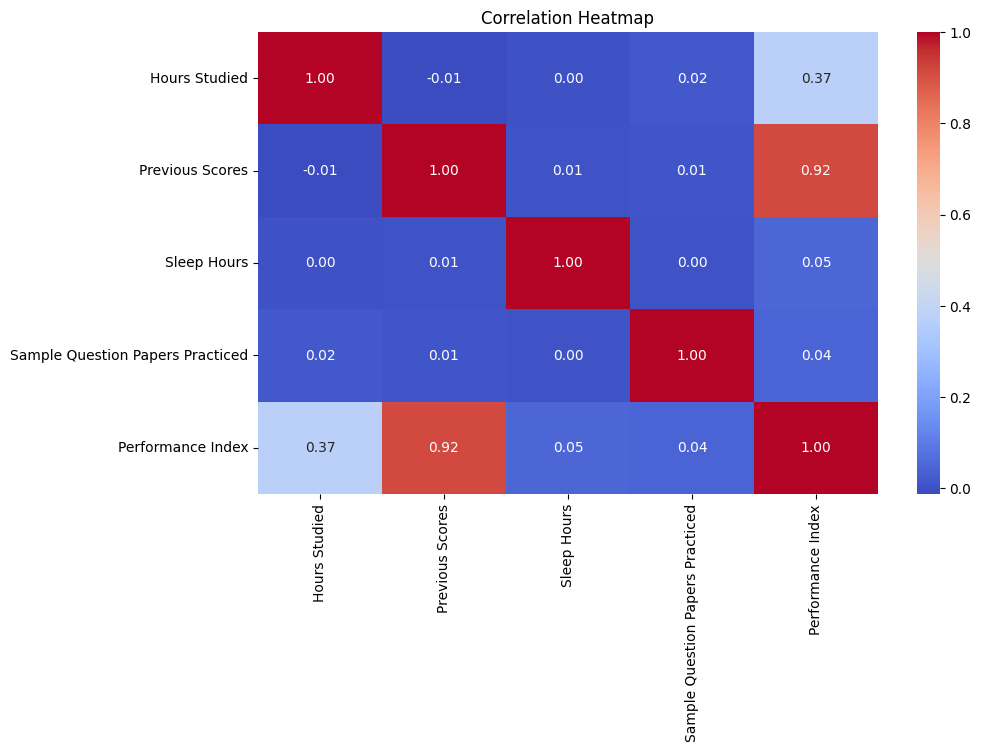

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading th e dataset
df = pd.read_csv(r"C:\Users\bbuser\Downloads\Student_Performance.csv")

# Explore structure
print(df.shape)
print(df.info())
print(df.head())

# Check for duplicates
print("Duplicates:", df.duplicated().sum())

# Summary statistics
print(df.describe())

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.select_dtypes(include="number").corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



In [14]:
print("Duplicates:", df.duplicated().sum())
droped_df = df.drop_duplicates()
print("Duplicates after dropping:", droped_df.duplicated().sum())

Duplicates: 127
Duplicates after dropping: 0


### step two is the data processing

In [6]:
from sklearn.model_selection import train_test_split

# coverting the data to a hot one encoding
df_encoded = pd.get_dummies(df, drop_first=True)
print(df_encoded.head())

   Hours Studied  Previous Scores  Sleep Hours  \
0              7               99            9   
1              4               82            4   
2              8               51            7   
3              5               52            5   
4              7               75            8   

   Sample Question Papers Practiced  Performance Index  \
0                                 1               91.0   
1                                 2               65.0   
2                                 2               45.0   
3                                 2               36.0   
4                                 5               66.0   

   Extracurricular Activities_Yes  
0                            True  
1                           False  
2                            True  
3                            True  
4                           False  


In [10]:
print(df.columns)

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')


### building the regesiin model

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
df_encoded = df.copy()
le = LabelEncoder()
df_encoded['Extracurricular Activities'] = le.fit_transform(df_encoded['Extracurricular Activities'])

#splitting the data
X = df_encoded.drop("Performance Index", axis=1)
y = df_encoded["Performance Index"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#training the model
model = LinearRegression()
model.fit(X_train, y_train)
print("Model coefficients:", model.coef_)
print("Model intercept:", model.intercept_) 


Model coefficients: [2.85248393 1.0169882  0.60861668 0.47694148 0.19183144]
Model intercept: -33.921946215556126


### Evaluate the Model

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predictions
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R^2 Score:", r2)

Mean Squared Error: 4.082628398521853
Root Mean Squared Error: 2.0205515085050054
R^2 Score: 0.9889832909573145
